# ***Linear Regression using scikit Learn***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


AGE

In [ ]:
import plotly.express as px  #Interactive chart

In [ ]:
df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
fig = px.histogram(df, x='age', marginal='box', nbins=47, title='Age Distribution')
fig.update_layout(bargap=0.2)
fig.show()

Body Mass Index

In [ ]:
fig = px.histogram(df, x='bmi', marginal='box', color_discrete_sequence=['red'], title='BMI Distribution')
fig.update_layout(bargap=0.2)
fig.show()

Charges

In [ ]:
fig = px.histogram(df, x='charges', marginal='box', color='smoker',color_discrete_sequence=['green', 'grey'], title='Charges Distribution')
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
fig = px.histogram(df, x='region', marginal='box', color='sex', title='Charges Distribution')
fig.update_layout(bargap=0.2)
fig.show()

Smoker

In [ ]:
df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
px.histogram(df, x='smoker', color='sex', title='Smoker')

<Axes: xlabel='smoker', ylabel='Count'>

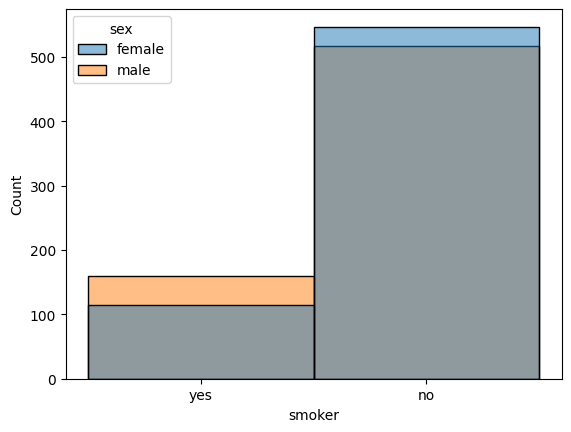

In [ ]:
sns.histplot(data=df, x='smoker', hue='sex')

In [ ]:
fig = px.histogram(df, x='sex', color='region', title='Smoker')
fig.show()

Age and Charges

In [ ]:
fig = px.scatter(df, x='age', y='charges', color='smoker', opacity=0.8, hover_data=['sex'], title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

BMI and Charges

In [ ]:
fig = px.scatter(df, x='bmi', y='charges', color='smoker', opacity=0.8, hover_data=['sex'], title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
px.violin(df, x='smoker', y='charges', color='sex', title='Smoker vs Charges')

Correlation

In [ ]:
df.charges.corr(df.age)

np.float64(0.2990081933306476)

In [ ]:
df.charges.corr(df.bmi)

np.float64(0.19834096883362895)

In [ ]:
df.charges.corr(df.children)

np.float64(0.06799822684790478)

In [ ]:
smoker_values = {'yes': 1, 'no': 0}
df['smoker_numeric'] = df.smoker.map(smoker_values)

In [ ]:
df.smoker_numeric

,smoker_numeric
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [ ]:
df.charges.corr(df.smoker_numeric)

np.float64(0.787251430498478)

In [ ]:
px.scatter(df,x='age', y='age')

In [ ]:
df[['age','bmi','children','charges']].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


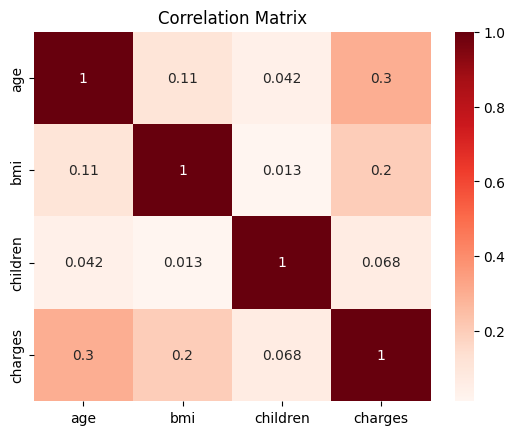

In [ ]:
sns.heatmap(df[['age','bmi','children','charges']].corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')
plt.show()

Linear Regresion using a single feature

In [ ]:
non_smoker = df[df.smoker == 'no']

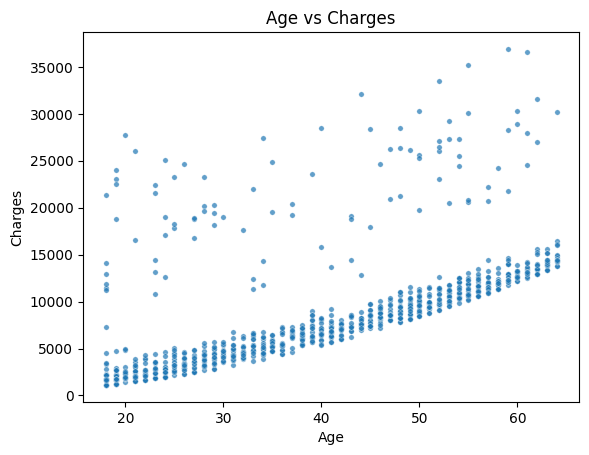

In [ ]:
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
sns.scatterplot(data=non_smoker, x='age', y='charges', alpha=0.7, s=15)
plt.show()

y = wx + b (linear regrestion)
*   (w called 'slope')
*   (b called 'intercepts')

MODEL

charges = w * age + b


In [ ]:
def estimate_charges(age, w, b):
  return w * age + b

In [ ]:
w = 50
b = 100

In [ ]:
ages = non_smoker.age
ages

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [ ]:
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [ ]:
non_smoker.charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


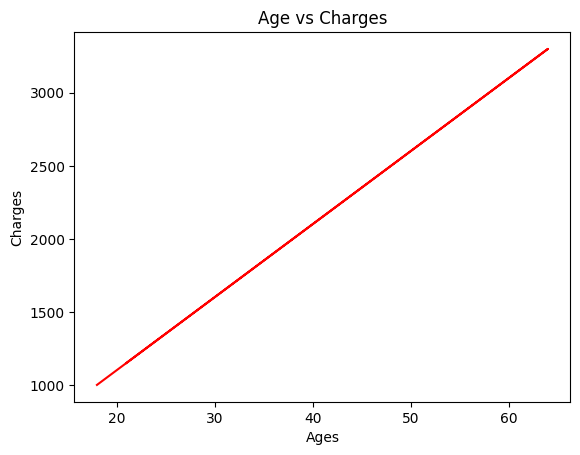

In [ ]:
plt.plot(ages, estimated_charges, color='red')
plt.xlabel('Ages')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()

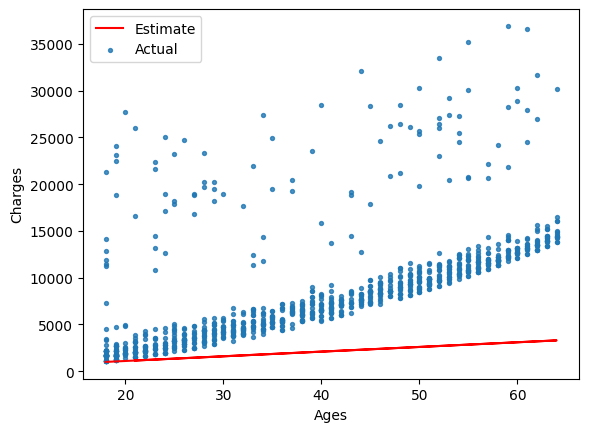

In [ ]:
target = non_smoker.charges

plt.plot(ages, estimated_charges, color='red')
plt.scatter(ages, target, alpha=0.8, s=8)
plt.xlabel('Ages')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])
plt.show()

In [ ]:
def try_parameters(w, b):
  ages = non_smoker.age
  target = non_smoker.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages, estimated_charges, color='red')
  plt.scatter(ages, target, alpha=0.8, s=8)
  plt.xlabel('Ages')
  plt.ylabel('Charges')
  plt.legend(['Estimate', 'Actual'])

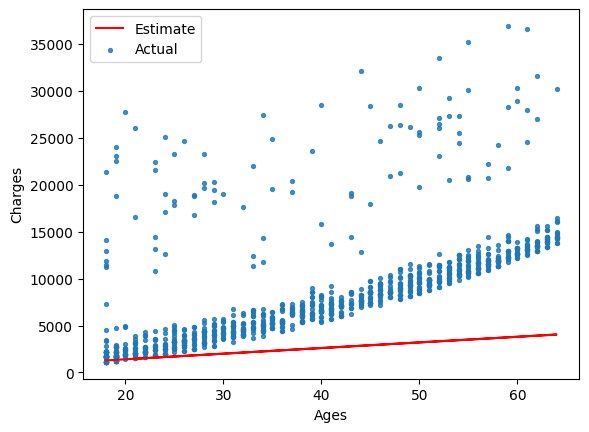

In [ ]:
try_parameters(60, 200)

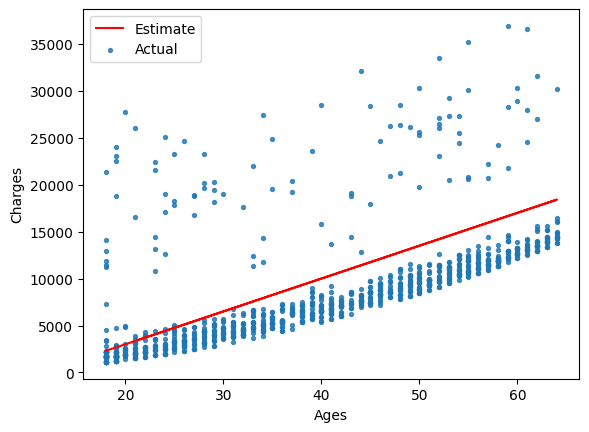

In [ ]:
try_parameters(350, -4000)

Loss/Cost Function

In [ ]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
w=50
b=100

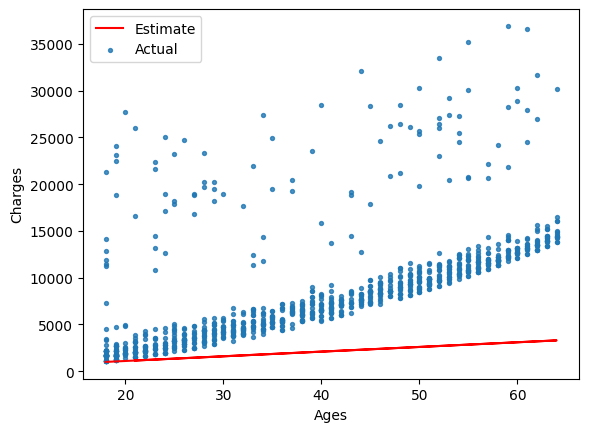

In [ ]:
try_parameters(w, b)

In [ ]:
targets = non_smoker['charges']
predicted = estimate_charges(non_smoker.age, w, b)

In [ ]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [ ]:
def try_parameters(w, b):
  ages = non_smoker.age
  target = non_smoker.charges
  predictions = estimate_charges(ages, w , b)

  plt.plot(ages, predictions, 'r', alpha=0.9)
  plt.scatter(ages, target, alpha=0.8, s=8)
  plt.xlabel('Ages')
  plt.ylabel('Charges')
  plt.legend(['Estimate', 'Actual'])

  loss = rmse(target, predictions)
  print(f'Loss: {loss}')

Loss: 4767.416184562645


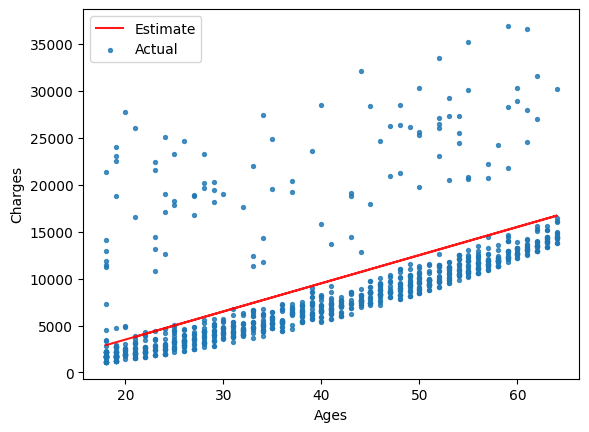

In [ ]:
try_parameters(300, -2500)

Optimizer\
Linear Regression using scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
inputs = non_smoker[['age']]
targets = non_smoker.charges
print('input.shape: ',inputs.shape)
print('targets.shape: ', targets.shape)

input.shape:  (1064, 1)
targets.shape:  (1064,)


In [ ]:
model.fit(inputs, targets)

LinearRegression()

In [ ]:
# We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predictions = model.predict(inputs)

In [ ]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
# let's compute the RMSE loss to evaluate the model
rmse(targets, predictions)

np.float64(4662.505766636395)

In [ ]:
# the parameters of the model are stored int the coef_ and intercept_ properties

# w
model.coef_

array([267.24891283])

In [ ]:
# b
model.intercept_

np.float64(-2091.4205565650864)

Loss: 4662.505766636395


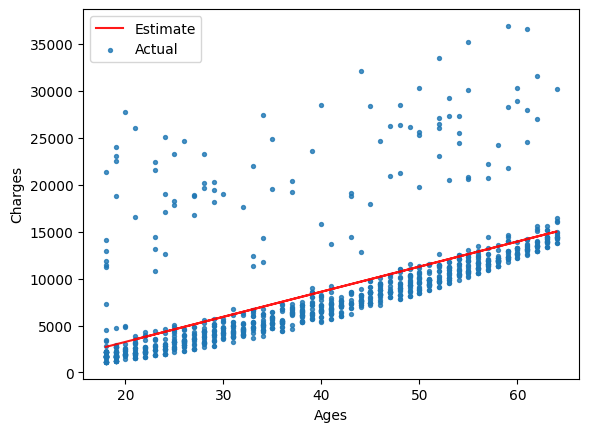

In [ ]:
try_parameters(model.coef_, model.intercept_)

Using SGDRegressor same as linear Regression

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sdg_regressor = SGDRegressor()

In [ ]:
sdg_regressor.fit(inputs, targets)

SGDRegressor()

In [ ]:
sdg_regressor.predict(np.array([[21],
                                [53],
                                [61]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([2829.25656017, 8017.5345404 , 9314.60403545])

In [ ]:
predict = sdg_regressor.predict(inputs)

In [ ]:
predict

array([2342.85549952, 3964.19236835, 4774.86080276, ..., 2342.85549952,
       2342.85549952, 2829.25656017])

In [ ]:
rmse(targets, predict)

np.float64(5551.079261160874)

Loss: 5551.079261160874


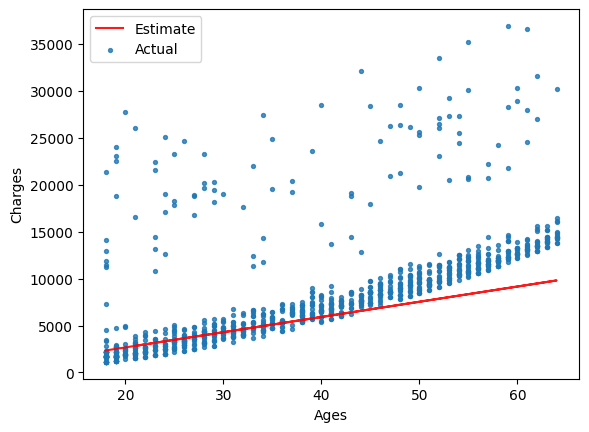

In [ ]:
try_parameters(sdg_regressor.coef_, sdg_regressor.intercept_)

Now for all the dataset

In [ ]:
# Create inputs and targets
inputs, targets = df[['age','bmi','children']], df['charges']

# Create  and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print(f'Loss: {loss}')

Loss: 11355.317901125973


In [ ]:
px.scatter(df, x='age', y='charges', color='smoker')

USING CATEGORICAL FEATURES FOR MACHINE LEARNING

Binary Categories

<Axes: xlabel='smoker', ylabel='charges'>

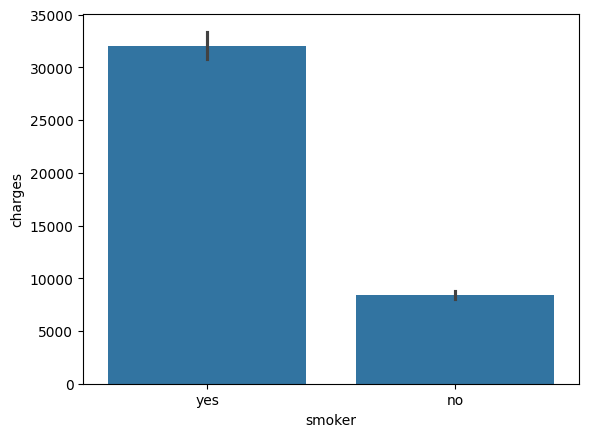

In [ ]:
sns.barplot(data=df, x='smoker', y='charges')

In [ ]:
smoker_codes = {'no': 0, 'yes': 1}
df['smoker_code'] = df.smoker.map(smoker_codes)

In [ ]:
df.charges.corr(df.smoker_code)

np.float64(0.787251430498478)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_numeric,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [ ]:
#Create input and targets
inputs, targets = df[['age','bmi','children','smoker_code']], df.charges

#Create and train the model
model = LinearRegression().fit(inputs, targets)

#Generate predictions
predictions = model.predict(inputs)

#Compute loss to evaluate the model
loss = rmse(targets, predictions)
print(f'Loss: {loss}')

Loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

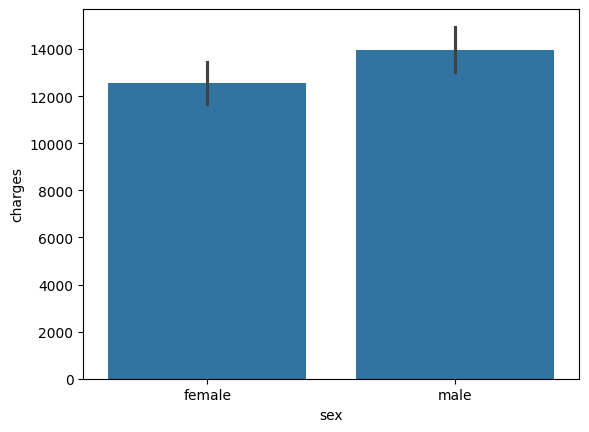

In [ ]:
sns.barplot(data=df, x='sex', y='charges')

In [ ]:
sex_codes = {'male': 1, 'female': 0}
df['sex_code'] = df.sex.map(sex_codes)

In [ ]:
df.charges.corr(df.sex_code)

np.float64(0.057292062202025484)

In [ ]:
# create input and targets
inputs, targets = df[['age','bmi','children','smoker_code','sex_code']], df.charges

# create and train the model
model = LinearRegression().fit(inputs, targets)

# generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print(f'Loss: {loss}')

Loss: 6056.100708754546


<Axes: xlabel='region', ylabel='charges'>

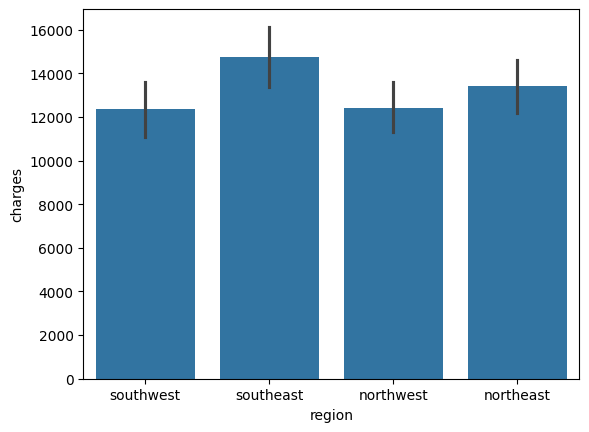

In [ ]:
sns.barplot(data=df, x='region', y='charges')

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
enc.transform([['northeast'],
               ['northwest']]).toarray()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
one_hot = enc.transform(df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_numeric,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0.0,0.0,0.0,1.0


In [ ]:
# Create inputs and targets
input_cols = ['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']
inputs, targets = df[input_cols], df['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# generate predictions
predictions = model.predict(inputs)

# compute loss to evaluate the model
loss = rmse(targets, predictions)
print(f'Loss: {loss}')

Loss: 6041.6796511744515


In [ ]:
df[input_cols].loc[10]

,10
age,25.00
bmi,26.22
children,0.00
smoker_code,0.00
sex_code,1.00
northeast,1.00
northwest,0.00
southeast,0.00
southwest,0.00


Model improvement

In [ ]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [ ]:
model.intercept_

np.float64(-12525.547811195444)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = df[cat_cols].values

In [ ]:
# Create inputs and targets
inputs = np.concatenate([scaled_inputs, categorical_data], axis=1)
targets = df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print(f'Loss: {loss}')

Loss: 6041.6796511744515


In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [ ]:
new_customers = [[28,30,2,1,0,0,1,0,0.]]

In [ ]:
scaler.transform([[28,30,2]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [ ]:
model.predict([[-0.79795355, -0.10882659,  0.75107928, 1, 0, 0, 1, 0, 0.]])

array([29875.81463371])

Create a test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [ ]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evaluate the model
loss = rmse(targets_test, predictions_test)
print(f'Loss: {loss}')

Loss: 6007.559242323016


In [ ]:
# Generate pridictions
predictions_train = model.predict(inputs_train)

# Compute loss to evaluate the model
loss = rmse(targets_train, predictions_train)
print(f'Loss: {loss}')

Loss: 6050.5359060612245
